# Local tests of lib functions before building the lib

This uses the same structure as the github repository

In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# loading useful libraries and functions:

import time
# measuring code execution time
global_start_time = time.time()

import os
import ipykernel
import requests
from notebook import notebookapp

def get_notebook_path():
    connection_file = os.path.basename(ipykernel.get_connection_file())
    kernel_id = connection_file.split('-', 1)[1].split('.')[0]

    for srv in notebookapp.list_running_servers():
        response = requests.get(f"{srv['url']}api/sessions", params={'token': srv.get('token', '')})
        for sess in response.json():
            if sess['kernel']['id'] == kernel_id:
                return os.path.join(srv['notebook_dir'], sess['notebook']['path'])



from pathlib import Path

# add to the directory containing the scripts to be tested (the package) to sys.path, 
# assuming that this notebook is located in the 
# tests/notebooks directory of the GitHub repository.
this_file_dir_path = Path(get_notebook_path()).resolve().parent 
dir_path = this_file_dir_path.parents[1] / "src"

import sys
if str(dir_path) not in sys.path :
    sys.path.append(str(dir_path))
#print(sys.path)

from bnn_for_14C_calibration.calibration import (
    individual_calibration,
    IntCal20_calibration,
    joint_calibration
)

from bnn_for_14C_calibration.calib_plot_functions import (
    plot_calib_results,
    plot_individual_calibration_curve_part_1,
    plot_individual_calibration_curve_part_2,
    plot_bnn_calibration_curve,
    plot_IntCal20_curve
)


import numpy as np

2025-09-18 17:45:16.730477: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


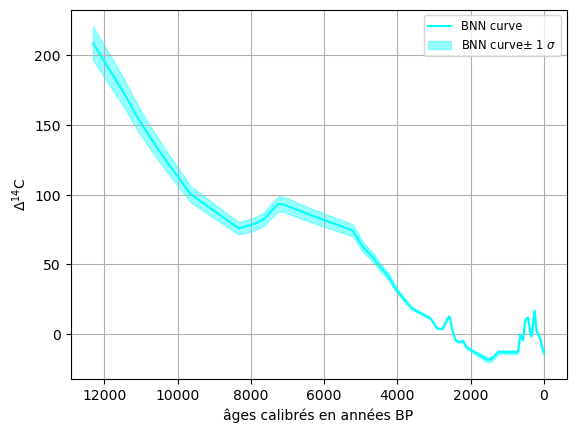

In [4]:
plot_individual_calibration_curve_part_1()

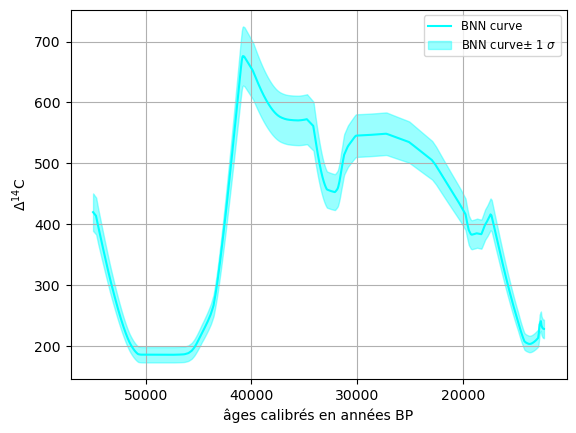

In [5]:
plot_individual_calibration_curve_part_2()

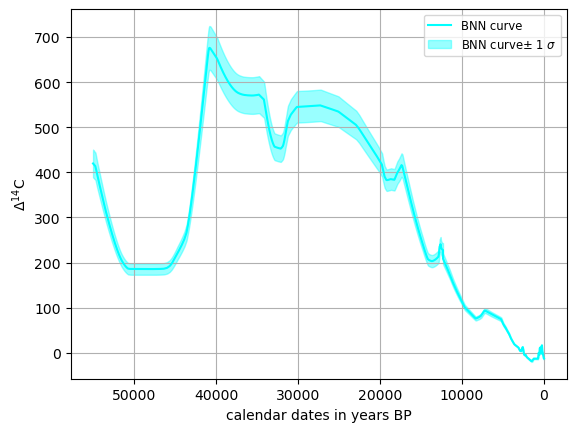

In [6]:
plot_bnn_calibration_curve()

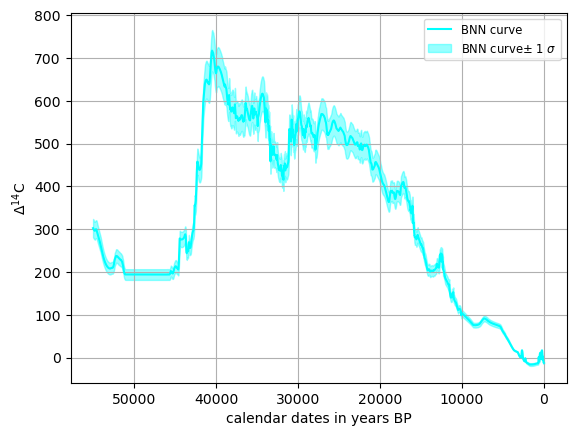

In [7]:
plot_bnn_calibration_curve(covariables = True)

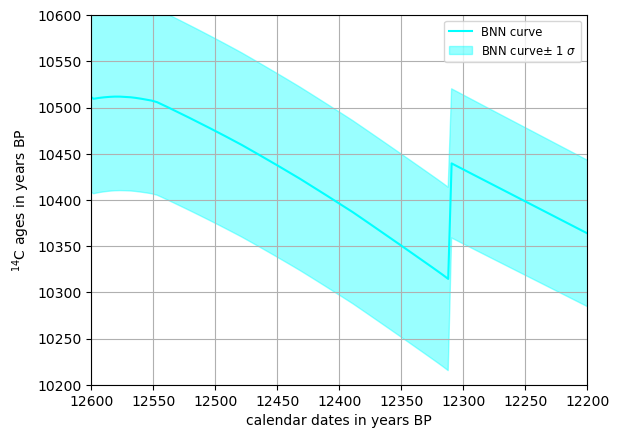

In [8]:
plot_bnn_calibration_curve(
    #covariables = True,
    domaine='c14',
    Max_x=12600,
    Min_x=12200,
    Max_y=10600,
    Min_y=10200
)

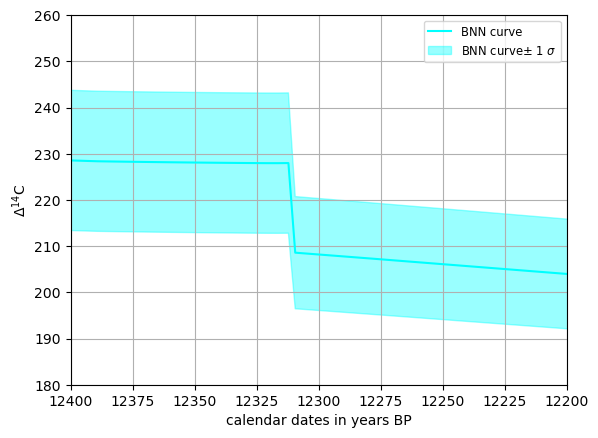

In [9]:
plot_bnn_calibration_curve(
    #covariables = True,
    Max_x=12400,
    Min_x=12200,
    Max_y=260,
    Min_y=180
)

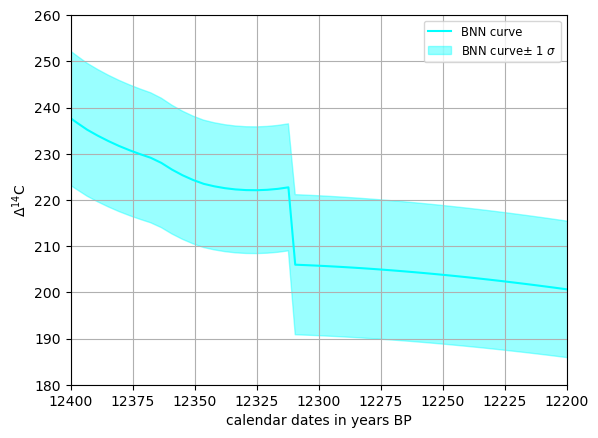

In [10]:
plot_bnn_calibration_curve(
    covariables = True,
    Max_x=12400,
    Min_x=12200,
    Max_y=260,
    Min_y=180
)

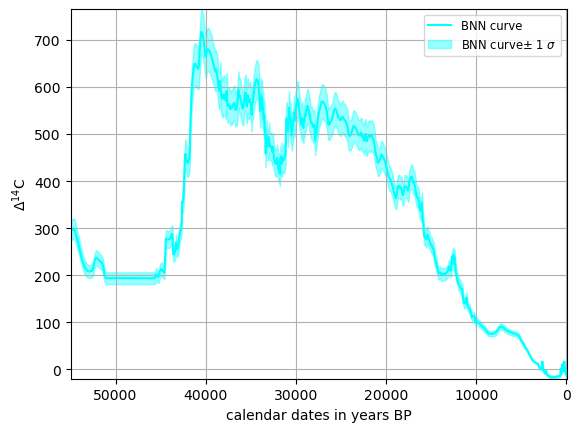

In [11]:
plot_bnn_calibration_curve(covariables = True, reset_margins=True)

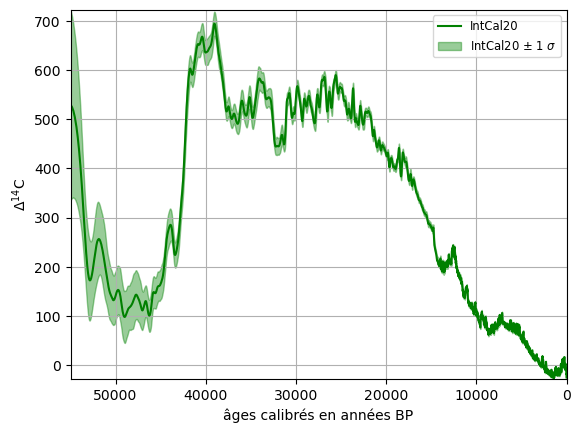

In [12]:
plot_IntCal20_curve(reset_margins=True)

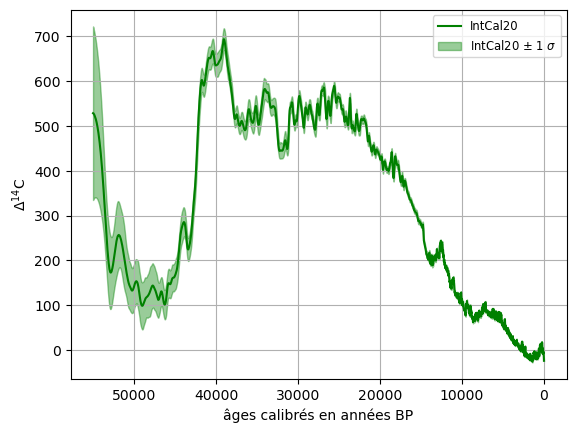

In [13]:
plot_IntCal20_curve()

In [14]:
c14age = 4000
c14sig = 10

In [15]:
c14age = 10483
c14sig = 18

In [16]:
c14age = 10400
c14sig = 18

In [17]:
individual_calib_results = individual_calibration(
    c14age, c14sig, 
    sample_size=10000,
    #covariables=True,
    compute_calage_posterior_mean_and_std=True
)
print(individual_calib_results)

{'calage_posterior_mode': 12208, 'calage_posterior_mode_density': 0.004876364275474341, 'connexe_HPD_intervals': array([[0.18939556, 0.19895774]]), 'connexe_HPD_intervals_density': [0.9500607994817136], 'HPD_threshold': 0.0007750276513481828, 'connexe_HPD_intervals_unscaled': array([[12051.406, 12660.058]]), 'connexe_HPD_intervals_unscaled_round': array([[12051, 12661]]), 'HPD_region_length': 609, 'alpha': 0.05, 'middle_points': array([-3.38430000e+00, -2.15290000e+00, -9.21500000e-01, ...,
        5.49893275e+04,  5.49935965e+04,  5.49978655e+04]), 'middle_points_density': array([0., 0., 0., ..., 0., 0., 0.]), 'calage_posterior_mean': 12254, 'calage_posterior_std': 137, 'calage_sample': array([12291.85319325, 12292.51798937, 12193.11353643, ...,
       12278.46996503, 12289.88322395, 12244.74412327]), 'c14age': 10400, 'c14sig': 18, 'covariables': False}


In [18]:
individual_calib_results_with_covariables = individual_calibration(
    c14age, c14sig, 
    sample_size=10000,
    covariables=True,
    compute_calage_posterior_mean_and_std=True
)
print(individual_calib_results_with_covariables)

{'calage_posterior_mode': 12478, 'calage_posterior_mode_density': 0.0034881816124843336, 'connexe_HPD_intervals': array([[0.18676453, 0.18693864],
       [0.18740294, 0.1988236 ]]), 'connexe_HPD_intervals_density': [0.00511283996719362, 0.9452959484403963], 'HPD_threshold': 0.0005668374218028947, 'connexe_HPD_intervals_unscaled': array([[11883.9356, 11895.0182],
       [11924.5718, 12651.52  ]]), 'connexe_HPD_intervals_unscaled_round': array([[11883, 11896],
       [11924, 12652]]), 'HPD_region_length': 739, 'alpha': 0.05, 'middle_points': array([-3.38430000e+00, -2.15290000e+00, -9.21500000e-01, ...,
        5.49893275e+04,  5.49935965e+04,  5.49978655e+04]), 'middle_points_density': array([0., 0., 0., ..., 0., 0., 0.]), 'calage_posterior_mean': 12187, 'calage_posterior_std': 168, 'calage_sample': array([12166.23390886, 12351.85854539, 12169.00403858, ...,
       12211.43496525, 12001.49201602, 12212.5893657 ]), 'c14age': 10400, 'c14sig': 18, 'covariables': True}


In [19]:
IntCal20_calib_results = IntCal20_calibration(
    c14age, c14sig,
    sample_size=10000,
    compute_calage_posterior_mean_and_std=True
)
print(IntCal20_calib_results)

{'calage_posterior_mode': 12198, 'calage_posterior_mode_density': 0.008665130689943174, 'connexe_HPD_intervals': array([[0.22003333, 0.22043333],
       [0.22053333, 0.22056667],
       [0.22073333, 0.22103333],
       [0.22116667, 0.22546667],
       [0.2259    , 0.22686667]]), 'connexe_HPD_intervals_density': [0.0471403771558527, 0.0017759976058458091, 0.019638169315629304, 0.7303317221721403, 0.15237221830937805], 'HPD_threshold': 0.0017670762738021058, 'connexe_HPD_intervals_unscaled': array([[12101.83333333, 12123.83333333],
       [12129.33333333, 12131.16666667],
       [12140.33333333, 12156.83333333],
       [12164.16666667, 12400.66666667],
       [12424.5       , 12477.66666667]]), 'connexe_HPD_intervals_unscaled_round': array([[12101, 12124],
       [12129, 12132],
       [12140, 12157],
       [12164, 12401],
       [12424, 12478]]), 'HPD_region_length': 331, 'alpha': 0.05, 'middle_points': array([9.16666667e-01, 2.75000000e+00, 4.58333333e+00, ...,
       5.49954167e+04, 

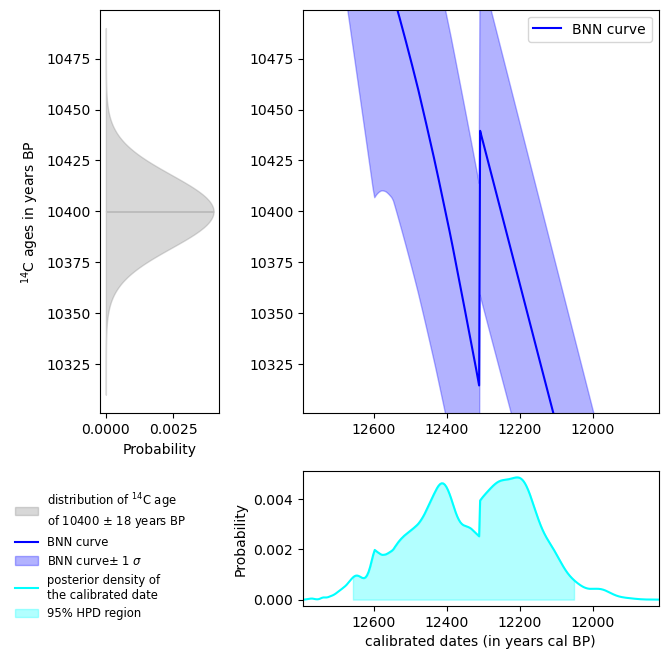

In [20]:
# choix des unités pour les axes afin de fixer la taille de la figure
cm = 1/2.54  # centimètres en pouces
figsize=(17*cm, 17*cm)
#figsize=(34*cm, 17*cm)

plot_calib_results(
    figsize=figsize,
    #add_grid=True,
    #color_cal_date='green',
    #eps=-1,
    #part_1=True,
    #part_2=True,
    #c14age=c14age,
    #c14sig=c14sig,
    calibration_results=individual_calib_results
)

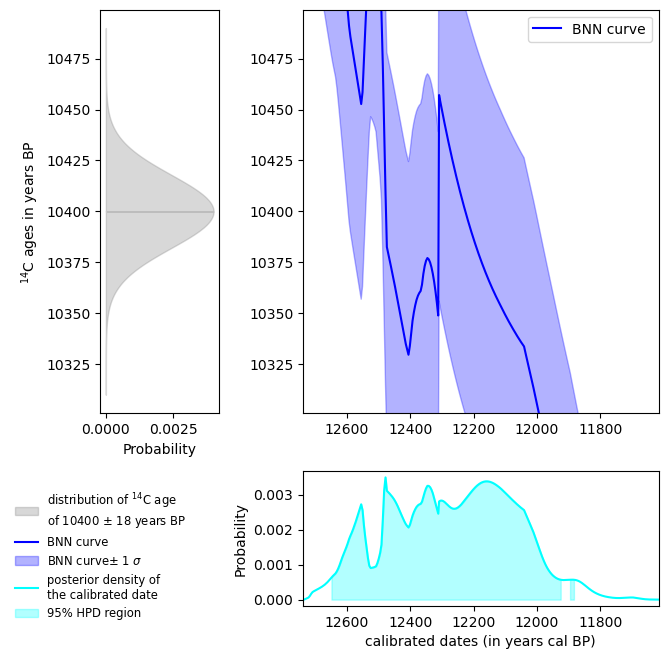

In [21]:
# choix des unités pour les axes afin de fixer la taille de la figure
cm = 1/2.54  # centimètres en pouces
figsize=(17*cm, 17*cm)
#figsize=(34*cm, 17*cm)

plot_calib_results(
    figsize=figsize,
    #add_grid=True,
    #color_cal_date='green',
    #eps=-1,
    #part_1=True,
    #part_2=True,
    #c14age=c14age,
    #c14sig=c14sig,
    calibration_results=individual_calib_results_with_covariables
)

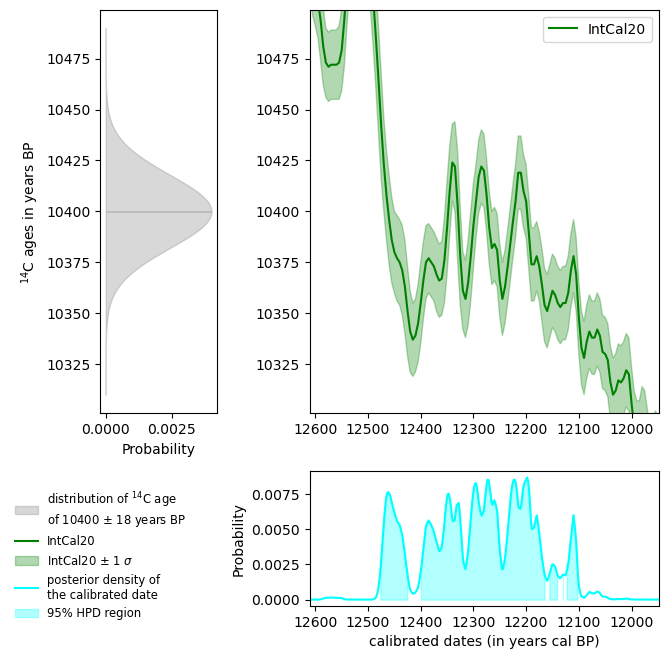

In [22]:
# choix des unités pour les axes afin de fixer la taille de la figure
cm = 1/2.54  # centimètres en pouces
figsize=(17*cm, 17*cm)

plot_calib_results(
    #plot_BNN=False,
    #add_grid=True,
    #color_cal_date='green',
    #color_IntCal20='blue',
    #eps=-1,
    figsize=figsize,
    #c14age=c14age,
    #c14sig=c14sig,
    calibration_results=IntCal20_calib_results
)

In [23]:
c14ages=np.array([4000, 10483])
c14sigs=np.array([10, 18])
joint_calib_results = joint_calibration(
    c14ages = c14ages, 
    c14sigs = c14sigs,
    compute_calage_posterior_mode=True,
    #chaine_length=1000
    chaine_length=10000
)
print(joint_calib_results)

2025-09-18 17:45:42.331767: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
`scale_identity_multiplier` is deprecated; please combine it into `scale_diag` directly instead.


Instructions for updating:
`scale_identity_multiplier` is deprecated; please combine it into `scale_diag` directly instead.


{'chaine': array([[ 4514.66867387,  4452.68067786,  4452.68067786, ...,
         4494.87639371,  4484.46146402,  4484.46146402],
       [12309.31247586, 12309.31247586, 12309.31247586, ...,
        12268.98521862, 12749.74316334, 12244.08226315]]), 'chaine_log_joint_density_unscaled': array([ 9.65294833,  9.47768296,  9.47768296, ..., 10.20072558,
        8.28907986, 10.09217198]), 'acceptance_rate': 0.9210921092109211, 'marginal_acceptance_rates': array([0.42014201, 0.85758576]), 'mode_index': 790, 'calage_posterior_mode': array([ 4484, 12309]), 'calage_posterior_mean': array([ 4484, 12359]), 'calage_posterior_std': array([ 22, 163])}


In [24]:
# test of cache downloading

from bnn_for_14C_calibration.manage_cache import(
    download_cache_lib_data
)

download_cache_lib_data(
    overwrite = True
)


                overwrite is True : the cache will be cleared before 
                downloading it again...
            
ℹ️ No existing cache!
******************** Creating cache directory at: /home/ashuzacirumanga-d/.bnn_for_14C_calibration ********************
📄 Found drive_map.json in https://api.github.com/repos/dest-ash/bnn_for_14C_calibration/contents/models/predictions?ref=main, downloading → /home/ashuzacirumanga-d/.bnn_for_14C_calibration/models/predictions/drive_map.json
⬇️ Downloading from Hugging Face: https://huggingface.co/datasets/dest-ash/saved_predictions_for_bnn_14C_lib/resolve/main/last_version.zip → /home/ashuzacirumanga-d/.bnn_for_14C_calibration/models/predictions/last_version
📦 Extracting zip /home/ashuzacirumanga-d/.bnn_for_14C_calibration/models/predictions/last_version.tmp → /home/ashuzacirumanga-d/.bnn_for_14C_calibration/models/predictions/last_version (flatten top-level folder)
⬇️ Downloading GitHub file https://raw.githubusercontent.com/dest-ash/bnn_for

In [25]:
# mesure du temps d'execution du code
global_end_time = time.time()
global_duration = global_end_time - global_start_time
print(f"""
    Runtime = {global_duration} second(s) 
            = {global_duration/60} minute(s)
            = {global_duration/3600} hour(s)
""")


    Runtime = 282.54339504241943 second(s) 
            = 4.709056584040324 minute(s)
            = 0.07848427640067207 hour(s)

